<a href="https://colab.research.google.com/github/RAHULSS23/project/blob/master/covid(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Dataset : https://www.dropbox.com/sh/g58jysy5rlm8z9n/AAAP3e2P1r8CvJkMSc9qhACNa?dl=0
!wget https://www.dropbox.com/sh/g58jysy5rlm8z9n/AAAP3e2P1r8CvJkMSc9qhACNa?dl=0

--2021-02-14 08:01:50--  https://www.dropbox.com/sh/g58jysy5rlm8z9n/AAAP3e2P1r8CvJkMSc9qhACNa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/g58jysy5rlm8z9n/AAAP3e2P1r8CvJkMSc9qhACNa [following]
--2021-02-14 08:01:50--  https://www.dropbox.com/sh/raw/g58jysy5rlm8z9n/AAAP3e2P1r8CvJkMSc9qhACNa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce8692cb1fe657707510d897411.dl.dropboxusercontent.com/zip_download_get/AsQxonA58Mg3jaSQ_fMOPiav2es5imjqwCj6QwA3y5mcTdZpRQn-E93FDPr2GEuhMTkEeiAabMkWOJPrRh52ywu2JsExKOAkaBfqxeIosRPoWw [following]
--2021-02-14 08:01:51--  https://uce8692cb1fe657707510d897411.dl.dropboxusercontent.com/zip_download_get/AsQxonA58Mg3jaSQ_fMOPiav2es5imjqwCj6QwA3y5mcTdZpRQn-E93FDPr2GEuhMTkEeiAabMkWOJPrR

In [ ]:
!unzip dataset

In [7]:
TRAIN_PATH = "covid_dataset/val"
VAL_PATH = "covid_dataset/Test"

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense

In [10]:
#CNN Based Model in Keras
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [12]:
#Train 
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'covid_dataset/val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 486 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [14]:
validation_generator = test_dataset.flow_from_directory(
    'covid_dataset/val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 486 images belonging to 2 classes.


In [15]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 17s 1s/step - loss: 0.8874 - accuracy: 0.6793 - val_loss: 0.5851 - val_accuracy: 0.7188
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 0.6241 - accuracy: 0.7143 - val_loss: 0.5259 - val_accuracy: 0.7031
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.4318 - accuracy: 0.7834 - val_loss: 0.3291 - val_accuracy: 0.9844
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.3822 - accuracy: 0.8466 - val_loss: 0.5076 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.3438 - accuracy: 0.8784 - val_loss: 0.2752 - val_accuracy: 0.9375
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.3705 - accuracy: 0.8767 - val_loss: 0.2665 - val_accuracy: 0.9688
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.2669 - accuracy: 0.9234 - val_loss: 0.1630 - val_accuracy: 0.9844
Epoch 8/10
8/8 [====================

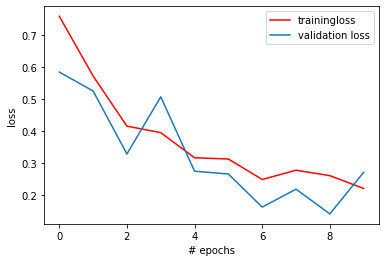

In [21]:
from matplotlib import pyplot as plt
plt.plot(hist.history['loss'],'r',label='trainingloss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

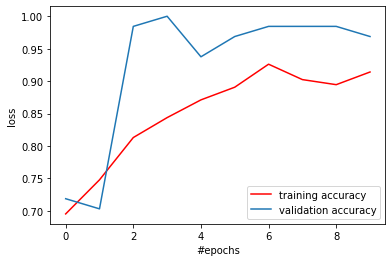

In [25]:
plt.plot(hist.history['accuracy'],'r',label='training accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()